<a href="https://www.kaggle.com/code/prasadposture121/titanic-machine-learning-from-disaster?scriptVersionId=105381775" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Titanic - Machine Learning from Disaster
The goal is to predict which passenger has survived the crash.

# Importing libraries

In [1]:
#Important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')

#Important functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier

# Reading the data

In [2]:
train_df=pd.read_csv('../input/titanic/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df=pd.read_csv('../input/titanic/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploratory Data Analysis

In [4]:
train_df.shape #(Rows,Columns)

(891, 12)

In [5]:
test_df.shape #(Rows,Columns)

(418, 11)

In [6]:
train_df.info() #all features, total number of tuples and data type of `train` data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_df.info() #all features, total number of tuples and data type of `test` data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
#Statistical Information
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#Statistical Information
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
#Stastical information of the categorical data
#train data
train_df.describe(include = ["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [11]:
#Stastical information of the categorical data
#test data
test_df.describe(include = ["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [12]:
#We will replace split the cabin to get significant information from it
#Splitting Cabin
Cabin_Text=[]
for i in train_df['Cabin']:
    Cabin_Text.append(str(i)[0])

#Creating new column for the new data
train_df['Cabin_Text']=Cabin_Text

#Replacing the 'n' with Null values as before
train_df['Cabin_Text'].replace({'n': np.nan},inplace=True)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Text
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [13]:
#doing all of the above procedure for the test data
Cabin_Text=[]
for i in test_df['Cabin']:
    Cabin_Text.append(str(i)[0])
        
test_df['Cabin_Text']=Cabin_Text

test_df['Cabin_Text'].replace({'n': np.nan},inplace=True)

test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Text
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN


# Data Visualization
Here we will see relationship betweeen various attributes and the survival.

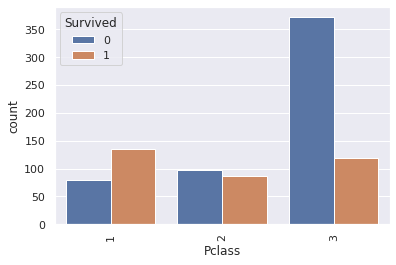

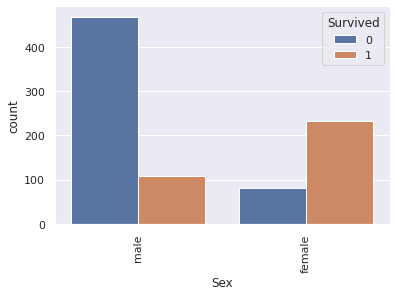

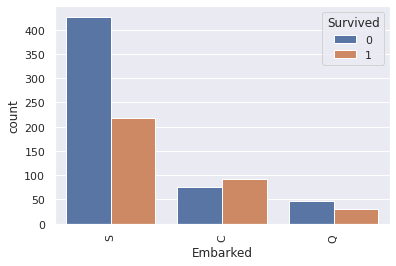

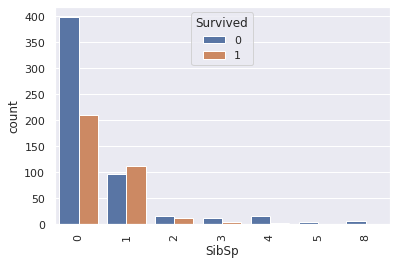

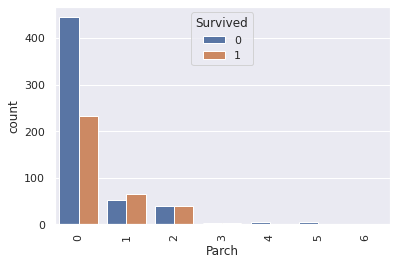

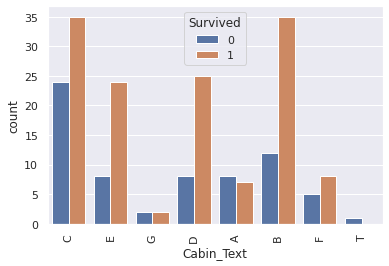

In [14]:
def plot_survived(param):
    g = sns.countplot(train_df[param],hue=train_df.Survived)
    plt.xticks(rotation=90);
    plt.show()
attributes=['Pclass','Sex','Embarked','SibSp','Parch','Cabin_Text']
for attribute in attributes:
    plot_survived(attribute)

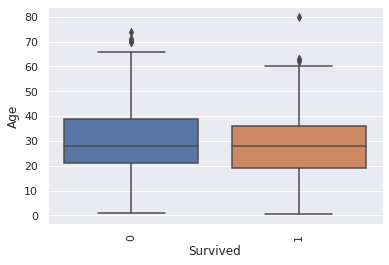

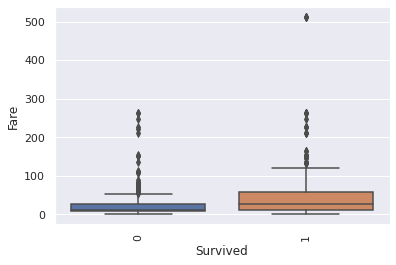

In [15]:
def plt_survived(param):
    sns.boxplot(y=train_df[param],x=train_df.Survived)
    plt.xticks(rotation=90);
    plt.show()
attributes=['Age','Fare']
for attribute in attributes:
    plt_survived(attribute)

<AxesSubplot:>

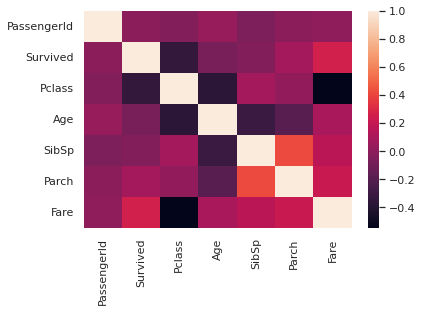

In [16]:
#Correlation between attributes of train data
sns.heatmap(train_df.corr())

<AxesSubplot:>

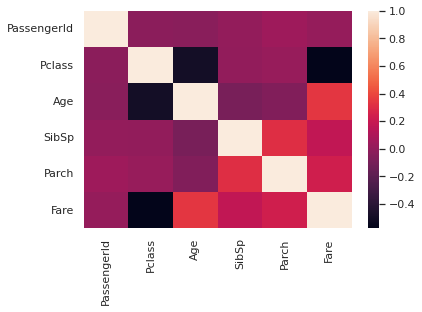

In [17]:
#Correlation between attributes of test data
sns.heatmap(test_df.corr())

# Missing Values

**Getting the missing values :** We will find out all the missing values from the dataset using `insa()`.

In [18]:
#Missing values from the train data
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Cabin_Text     687
dtype: int64

In [19]:
#Missing vales from the test data
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Cabin_Text     327
dtype: int64

**Filling the missing values:** We will fill the missing values using the available stastical information about the dataset and with a little common sense.

In [20]:
#filling missing ages from the train data by median based on the survival
cond=train_df['Survived']==0

train_df['Age'].fillna(cond.map({True:train_df.loc[train_df['Survived']==0]['Age'].median(),
                                False:train_df.loc[train_df['Survived']==1]['Age'].median()
                                }),inplace=True)

#filling missing values from the test data by median of the data
test_df['Age'].fillna(test_df['Age'].median(),inplace=True)

#filling missing values of the Cabin Text by most appeared value
train_df['Cabin_Text'].fillna('C',inplace=True)
test_df['Cabin_Text'].fillna('C',inplace=True)

#filling missing values of the Embarked by most appeared value
train_df['Embarked'].fillna('S',inplace=True)

#filling Fare with the median of the data
test_df['Fare'].fillna(test_df['Fare'].median(),inplace=True);

# Feature Engineering

In [21]:
#Since there are no null values in passenger ID we can directly use it as default ID
#setting PassengerId as the Id
train_df.set_index('PassengerId',inplace=True)
test_df.set_index('PassengerId',inplace=True)

**Dropping Columns :** Here we will drop columns which aren't significant

In [22]:
train_df= train_df.drop(['Name','Cabin','Ticket'],axis=1)
test_df= test_df.drop(['Name','Cabin','Ticket'],axis=1)

**Labelling the categorical data**

In [23]:
cat_attributes= ['Sex','Cabin_Text','Embarked']
for i in cat_attributes:
    le=LabelEncoder()
    arr=np.concatenate((train_df[i], test_df[i])).astype(str)
    le.fit(arr)
    train_df[i]=le.transform(train_df[i].astype(str))
    test_df[i]=le.transform(test_df[i].astype(str))

In [24]:
#Labelling the response variable
train_df['Survived']=train_df['Survived'].replace({True:1,False:0})

# Modeling

In [25]:
#Seperating Response Variable from the dataset
X=train_df.drop('Survived',axis=1)
y=train_df['Survived']

In [26]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Cabin_Text'],
      dtype='object')

In [27]:
#train_test_split()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1)

In [28]:
#Models
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('DT',DecisionTreeClassifier()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))
models.append(('RFC',RandomForestClassifier()))
models.append(('MLPC',MLPClassifier()))
models.append(('CBC',CatBoostClassifier()))

In [29]:
#Evaluation of models
results=[]
names=[]
for name,model in models:
    kfold=StratifiedKFold(n_splits=10)#random_state=1
    cv_results=cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' %(name,cv_results.mean(),cv_results.std()))

LR: 0.805405 (0.051637)
DT: 0.763569 (0.045712)
LDA: 0.802397 (0.055759)
KNN: 0.696336 (0.049863)
NB: 0.790547 (0.039519)
SVM: 0.706649 (0.040880)
RFC: 0.832429 (0.039764)
MLPC: 0.735301 (0.066722)
Learning rate set to 0.008289
0:	learn: 0.6895856	total: 55.6ms	remaining: 55.6s
1:	learn: 0.6840694	total: 56.8ms	remaining: 28.3s
2:	learn: 0.6801423	total: 57.2ms	remaining: 19s
3:	learn: 0.6750000	total: 57.7ms	remaining: 14.4s
4:	learn: 0.6702430	total: 58.1ms	remaining: 11.6s
5:	learn: 0.6664253	total: 58.4ms	remaining: 9.67s
6:	learn: 0.6607208	total: 59.2ms	remaining: 8.4s
7:	learn: 0.6563761	total: 60ms	remaining: 7.44s
8:	learn: 0.6506694	total: 60.8ms	remaining: 6.7s
9:	learn: 0.6449383	total: 61.6ms	remaining: 6.1s
10:	learn: 0.6413000	total: 62.1ms	remaining: 5.58s
11:	learn: 0.6367901	total: 62.9ms	remaining: 5.18s
12:	learn: 0.6314998	total: 64ms	remaining: 4.86s
13:	learn: 0.6270263	total: 64.7ms	remaining: 4.56s
14:	learn: 0.6226976	total: 65.6ms	remaining: 4.31s
15:	learn: 

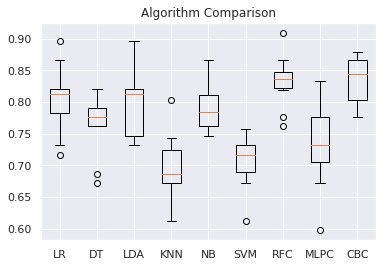

In [30]:
#Compare our models
plt.boxplot(results,labels=names)
plt.title("Algorithm Comparison")
plt.show()

**Fitting the model**

In [31]:
#We will continue with best performing algorithm i.e. CatBoostClassifier 
cbc = CatBoostClassifier()

In [32]:
#fitting model to train data
cbc.fit(X_train,y_train)

Learning rate set to 0.008672
0:	learn: 0.6897404	total: 516us	remaining: 516ms
1:	learn: 0.6843645	total: 1.51ms	remaining: 755ms
2:	learn: 0.6799658	total: 2.18ms	remaining: 724ms
3:	learn: 0.6747702	total: 2.9ms	remaining: 723ms
4:	learn: 0.6700671	total: 3.37ms	remaining: 671ms
5:	learn: 0.6648644	total: 4.26ms	remaining: 706ms
6:	learn: 0.6584424	total: 5.27ms	remaining: 747ms
7:	learn: 0.6532462	total: 6.27ms	remaining: 778ms
8:	learn: 0.6481141	total: 7.14ms	remaining: 786ms
9:	learn: 0.6428561	total: 8.07ms	remaining: 799ms
10:	learn: 0.6380585	total: 8.92ms	remaining: 802ms
11:	learn: 0.6325944	total: 9.86ms	remaining: 812ms
12:	learn: 0.6279130	total: 10.6ms	remaining: 808ms
13:	learn: 0.6240358	total: 11.2ms	remaining: 790ms
14:	learn: 0.6202086	total: 12ms	remaining: 788ms
15:	learn: 0.6154633	total: 12.9ms	remaining: 792ms
16:	learn: 0.6110169	total: 13.7ms	remaining: 795ms
17:	learn: 0.6070062	total: 14.5ms	remaining: 792ms
18:	learn: 0.6029691	total: 15.3ms	remaining: 79

In [33]:
pred_y=cbc.predict(X_val)
pred=cbc.predict(X_train)   
print(accuracy_score(y_train.values,pred))
print(accuracy_score(y_val.values,pred_y))

0.9086826347305389
0.7892376681614349


In [34]:
#fitting model to entire data
cbc.fit(X,y)

Learning rate set to 0.009807
0:	learn: 0.6862930	total: 1.21ms	remaining: 1.2s
1:	learn: 0.6804610	total: 2.24ms	remaining: 1.12s
2:	learn: 0.6742839	total: 3.28ms	remaining: 1.09s
3:	learn: 0.6691334	total: 3.92ms	remaining: 976ms
4:	learn: 0.6635199	total: 5.12ms	remaining: 1.02s
5:	learn: 0.6578599	total: 6.25ms	remaining: 1.03s
6:	learn: 0.6521911	total: 7.41ms	remaining: 1.05s
7:	learn: 0.6460635	total: 8.57ms	remaining: 1.06s
8:	learn: 0.6404501	total: 9.73ms	remaining: 1.07s
9:	learn: 0.6352476	total: 10.9ms	remaining: 1.08s
10:	learn: 0.6297540	total: 12.1ms	remaining: 1.08s
11:	learn: 0.6243762	total: 13.2ms	remaining: 1.09s
12:	learn: 0.6202452	total: 14ms	remaining: 1.06s
13:	learn: 0.6164046	total: 14.9ms	remaining: 1.05s
14:	learn: 0.6110469	total: 15.9ms	remaining: 1.04s
15:	learn: 0.6064366	total: 16.8ms	remaining: 1.03s
16:	learn: 0.6023229	total: 17.4ms	remaining: 1.01s
17:	learn: 0.5982118	total: 18.4ms	remaining: 1s
18:	learn: 0.5941988	total: 19.1ms	remaining: 984m

In [35]:
#Predicting on whole data
pred=cbc.predict(X)   
print(accuracy_score(y.values,pred))

0.8956228956228957


In [36]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Text
PassengerId,,,,,,,,
892,3,1,34.5,0,0,7.8292,1,2
893,3,0,47.0,1,0,7.0000,2,2
894,2,1,62.0,0,0,9.6875,1,2
895,3,1,27.0,0,0,8.6625,2,2
896,3,0,22.0,1,1,12.2875,2,2
...,...,...,...,...,...,...,...,...
1305,3,1,27.0,0,0,8.0500,2,2
1306,1,0,39.0,0,0,108.9000,0,2
1307,3,1,38.5,0,0,7.2500,2,2


# Predictions

In [37]:
y_pred=cbc.predict(test_df)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [38]:
#Adding our predictions to the test data
test_df['Survived']=y_pred
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Text,Survived
PassengerId,,,,,,,,,
892,3,1,34.5,0,0,7.8292,1,2,0
893,3,0,47.0,1,0,7.0000,2,2,0
894,2,1,62.0,0,0,9.6875,1,2,0
895,3,1,27.0,0,0,8.6625,2,2,0
896,3,0,22.0,1,1,12.2875,2,2,0


In [39]:
#Since all the females survived we need to replace the survival rate for them as True
test_df.loc[test_df['Sex']==0,'Survived']=1
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Text,Survived
PassengerId,,,,,,,,,
892,3,1,34.5,0,0,7.8292,1,2,0
893,3,0,47.0,1,0,7.0000,2,2,1
894,2,1,62.0,0,0,9.6875,1,2,0
895,3,1,27.0,0,0,8.6625,2,2,0
896,3,0,22.0,1,1,12.2875,2,2,1


In [40]:
submission=pd.DataFrame({'Survived':test_df['Survived']},index=test_df.index)
submission.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [41]:
y_pred=list(test_df['Survived'])
m=0
n=0
for i in y_pred:
    if i==0:
        m+=1
    else:
        n+=1
print(m,'people have survied.')
print(n,'people have died.')

246 people have survied.
172 people have died.


In [42]:
#Saving this file for submissions
submission.to_csv('submission.csv')

The End